In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import os
import unidecode
import plotly.io as pio
pio.kaleido.scope.mathjax = None
pio.templates.default = "plotly_white"
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing

In [2]:
def read_csvs(path):
    """Function to read all csv files in diferent folders and return a dataframe

    Args:
        path (str): path to the folder with the csv files

    Returns:
        pd.DataFrame: dataframe with all the data
    """
    folders = []
    directory = os.path.join(path)
    for root,dirs,files in os.walk(directory):
        folders.append(root)
    del folders[0]

    data_final = []
    for folder in folders:
        df = pd.concat(map(pd.read_csv, glob.glob(os.path.join(folder + "/*.csv"))))
        state_name = folder.split("/")[-1]
        state_name = unidecode.unidecode(state_name.lower())
        state_name = state_name.replace(" ", "_")
        df['estado'] = state_name
        data_final.append(df)
    
    concat_data = pd.concat(data_final,ignore_index=True)
    return concat_data

def save_html_png(figure, name):
    """Function to save a plotly figure as html and png

    Args:
        figure (plotly fig): plotly figure
        name (str): name of the file
    """
    figure.write_html('./assets/images/html/' + name + '.html')
    figure.write_image('./assets/images/png/' + name + '.png')

In [3]:
#read scraped data from year 2022 and count nan values
data_2022 = read_csvs("./scraped_data_2022/")
data_2022.drop(['Descripción', 'Tarifa'], axis=1, inplace=True)
data_2022['date'] = pd.to_datetime(data_2022.year.astype(str) + '/' + data_2022.month.astype(str))
data_2022.isna().sum()

Int. Horario      0
Cargo             0
Unidades          0
Valor             0
year              0
month             0
state             0
municipality      0
division          0
division_value    0
estado            0
date              0
dtype: int64

In [4]:
#read scraped data from year 2021 and count nan values
data_2021 = read_csvs("./scraped_data_2021/")
data_2021.drop(['Descripción', 'Tarifa'], axis=1, inplace=True)
data_2021['date'] = pd.to_datetime(data_2021.year.astype(str) + '/' + data_2021.month.astype(str))
data_2021.isna().sum()

Int. Horario      0
Cargo             0
Unidades          0
Valor             0
year              0
month             0
state             0
municipality      0
division          0
division_value    0
estado            0
date              0
dtype: int64

In [5]:
#read scraped data from year 2020 and count nan values
data_2020 = read_csvs("./scraped_data_2020/")
data_2020.drop(['Descripción', 'Tarifa'], axis=1, inplace=True)
data_2020['date'] = pd.to_datetime(data_2020.year.astype(str) + '/' + data_2020.month.astype(str))
data_2020.isna().sum()

Int. Horario      0
Cargo             0
Unidades          0
Valor             0
year              0
month             0
state             0
municipality      0
division          0
division_value    0
estado            0
date              0
dtype: int64

In [6]:
#get unique divisiones in the 2020s data
data_2020.sort_values(by='division').division.unique()

array(['BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR', 'BAJÍO',
       'BAJÍO Y GOLFO CENTRO', 'BAJÍO Y GOLFO NORTE',
       'BAJÍO Y GOLFO NORTE Y NORTE', 'BAJÍO Y NORTE', 'CENTRO OCCIDENTE',
       'CENTRO OCCIDENTE Y JALISCO', 'CENTRO ORIENTE', 'CENTRO SUR',
       'GOLFO CENTRO', 'GOLFO CENTRO Y GOLFO NORTE',
       'GOLFO CENTRO Y ORIENTE', 'GOLFO NORTE', 'GOLFO NORTE Y NORTE',
       'JALISCO', 'NOROESTE', 'NOROESTE Y NORTE', 'NORTE', 'ORIENTE',
       'PENINSULAR', 'SURESTE', 'VALLE DE MÉXICO CENTRO',
       'VALLE DE MÉXICO CENTRO Y SUR', 'VALLE DE MÉXICO NORTE',
       'VALLE DE MÉXICO NORTE Y CENTRO',
       'VALLE DE MÉXICO NORTE, CENTRO Y SUR', 'VALLE DE MÉXICO SUR',
       'VALLE DE MÉXICO SUR Y CENTRO ORIENTE'], dtype=object)

In [7]:
#list with the divisiones to be analyzed ( CFE oficiales)
division_oficial = ['BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR', 'BAJÍO',
    'CENTRO OCCIDENTE', 'CENTRO ORIENTE', 'CENTRO SUR', 'GOLFO CENTRO','GOLFO NORTE',
    'JALISCO', 'NOROESTE', 'NORTE', 'ORIENTE', 'PENINSULAR', 'SURESTE', 
    'VALLE DE MÉXICO CENTRO', 'VALLE DE MÉXICO NORTE', 'VALLE DE MÉXICO SUR']

print("La cantidad de divisiones oficiales es:", len(division_oficial))

La cantidad de divisiones oficiales es: 17


In [8]:
def get_cargo_variacion(data, anio, division_oficial, tipo_cargo, etiqueta = 'Cargo fijo ($/mes)'):
    """Function to get the cargo fijo and variacion for a given year and division

    Args:
        data (pd.DataFrame): dataframe with the data of specific year
        anio (str or int): year to be analyzed
        division_oficial (list): list with the divisiones to be analyzed
        tipo_cargo (str): type of cargo to be analyzed
        etiqueta (str, optional): label for the cargo. Defaults to 'Cargo fijo ($/mes)'.

    Returns:
        plotly fig: plotly figure with the cargo fijo and variacion for a given year and division
    """
    cargo = data[(data.division.isin(division_oficial))&(data.Cargo==tipo_cargo)]
    cargo.reset_index(drop=True, inplace=True)
    fig = px.line(cargo, x='date', y='Valor', color='division', line_group = 'estado',
        title='Variación de la tarifa de cargo {} por division durante el año {}'.format(tipo_cargo,anio),
        labels={'date':'Fecha por mes', 'Valor':etiqueta}, width=1200, height=650, markers=True,
        color_discrete_sequence=px.colors.qualitative.Alphabet)
    return fig

### Save figs with all possible variarions (carho fijo, distribucion, capacidad)

In [9]:
cargo_fijo_2020 = get_cargo_variacion(data_2020, 2020, division_oficial, 'Fijo', 'Cargo fijo ($/mes)')
save_html_png(cargo_fijo_2020, 'cargo_fijo_2020')

cargo_fijo_2021 = get_cargo_variacion(data_2021, 2021, division_oficial, 'Fijo', 'Cargo fijo ($/mes)')
save_html_png(cargo_fijo_2021, 'cargo_fijo_2021')

cargo_fijo_2022 = get_cargo_variacion(data_2022, 2022, division_oficial, 'Fijo', 'Cargo fijo ($/mes)')
save_html_png(cargo_fijo_2022, 'cargo_fijo_2022')

In [10]:
cargo_dist_2020 = get_cargo_variacion(data_2020,2020,division_oficial,'Distribución','Distribución ($/kW)')
save_html_png(cargo_dist_2020, 'distribucion_2020')

cargo_dist_2021 = get_cargo_variacion(data_2021,2021,division_oficial,'Distribución','Distribución ($/kW)')
save_html_png(cargo_dist_2021, 'distribucion_2021')

cargo_dist_2022 = get_cargo_variacion(data_2022,2022,division_oficial,'Distribución','Distribución ($/kW)')
save_html_png(cargo_dist_2022, 'distribucion_2022')

In [11]:
cargo_cap_2020 = get_cargo_variacion(data_2020,2020,division_oficial,'Capacidad','Capacidad ($/kW)')
save_html_png(cargo_cap_2020, 'capacidad_2020')

cargo_cap_2021 = get_cargo_variacion(data_2021,2021,division_oficial,'Capacidad','Capacidad ($/kW)')
save_html_png(cargo_cap_2021, 'capacidad_2021')

cargo_cap_2022 = get_cargo_variacion(data_2022,2022,division_oficial,'Capacidad','Capacidad ($/kW)')
save_html_png(cargo_cap_2022, 'capacidad_2022')

In [12]:
def get_violin_plot(data, anio, division_oficial):
    """Function to get the violin plot for a given year and division

    Args:
        data (pd.DataFrame): dataframe with the data of specific year
        anio (strr or int): year to be analyzed
        division_oficial (list): list with the divisiones to be analyzed

    Returns:
        plotly fig: plotly figure with the violin plot for a given year and division
    """
    cargo = data[(data.division.isin(division_oficial))&(data.Cargo=='Capacidad')]
    cargo.reset_index(drop=True, inplace=True)
    fig = px.violin(cargo, y="Valor", color="division", box=True, points='suspectedoutliers',
        title='Distribución de la tarifa de cargo capacidad por division durante el año {}'.format(anio),
        labels={'Valor':'Capacidad ($/kW)'}, width=1200, height=650,
        color_discrete_sequence=px.colors.qualitative.Alphabet)
    return fig

def get_boxplots(data, anio, division_oficial, tipo='Capacidad'):
    """Function to get the boxplots for a given year and division

    Args:
        data (pd.DataFrame): dataframe with the data of specific year
        anio (str or int): year to be analyzed
        division_oficial (list): list with the divisiones to be analyzed
        tipo (str, optional): type of value to be analyzed. Defaults to 'Capacidad'.

    Returns:
        plotly fig: plotly figure with the boxplots for a given year and division
    """
    if tipo == 'Capacidad':
        cargo = data[(data.division.isin(division_oficial))&(data.Cargo=='Capacidad')]
        fig_title = 'Estadística de la distribución de la tarifa de cargo capacidad por division durante el año {}'.format(anio)
        lbl = 'Capacidad ($/kW)'

    else:
        cargo = data[(data.division.isin(division_oficial))&(data['Int. Horario']==tipo)]
        fig_title = 'Estadística de la distribución de la tarifa int. horario {} por division durante el año {}'.format(tipo, anio)
        lbl = 'Capacidad ($/kWh)'

    cargo.reset_index(drop=True, inplace=True)
    grouped_data = cargo[['Valor', 'division', 'date']].groupby(['division','date']).mean()#agg([np.mean, np.std])
    grouped_data_std = cargo[['Valor', 'division', 'date']].groupby(['division','date']).std()
    grouped_data.reset_index(inplace=True)
    grouped_data_std.reset_index(inplace=True)

    if grouped_data_std.Valor.sum() == 0:
        fig = px.box(grouped_data, y="Valor", color="division", points='suspectedoutliers',
            labels={'Valor':lbl}, width=1200, height=650,
            title=fig_title,
            color_discrete_sequence=px.colors.qualitative.Alphabet)
        return fig
    else:
        print('Hay variaciones en la tarifa de capacidad intraregión revisar')
        return None

### Save violin and boxplot of cargo capacidad per year

In [13]:
violin_cap_2020 = get_violin_plot(data_2020,2020,division_oficial)
save_html_png(violin_cap_2020, 'violin_capacidad_2020')

violin_cap_2021 = get_violin_plot(data_2021,2021,division_oficial)
save_html_png(violin_cap_2021, 'violin_capacidad_2021')

violin_cap_2022 = get_violin_plot(data_2022,2022,division_oficial)
save_html_png(violin_cap_2022, 'violin_capacidad_2022')

In [14]:
box_cap_2020 = get_boxplots(data_2020,2020,division_oficial)
save_html_png(box_cap_2020, 'boxplot_capacidad_2020')

box_cap_2021 = get_boxplots(data_2021,2021,division_oficial)
save_html_png(box_cap_2021, 'boxplot_capacidad_2021')

box_cap_2022 = get_boxplots(data_2022,2022,division_oficial)
save_html_png(box_cap_2022, 'boxplot_capacidad_2022')

In [15]:
def get_variacion_tarifas(data, anio, division_oficial, tarifa_horario, rango_y = [0.5, 2.1], type_plot='area'):
    """Function to get the variation of the tarifas for a given year and division

    Args:
        data (pd.DataFrame): dataframe with the data of specific year
        anio (str or int): year to be analyzed
        division_oficial (list): list with the divisiones to be analyzed
        tarifa_horario (str): type of tarifa to be analyzed
        rango_y (list, optional): range of the y axis. Defaults to [0.5, 2.1].
        type_plot (str, optional): type of plot to be used. Defaults to 'area'.
    Returns:
        plotly fig: plotly figure with the variation of the tarifas for a given year, division and type of tarifa
    """
    croped_data = data[(data['Int. Horario'] == tarifa_horario)&(data['division'].isin(division_oficial))]
    croped_data.reset_index(drop=True, inplace=True)
    croped_data = croped_data[['Valor','month', 'division', 'date']].groupby(['division','date']).agg([np.mean, np.std])
    croped_data.reset_index(inplace=True)

    if croped_data.Valor['std'].sum() == 0.0:
        croped_data = croped_data.pivot(index='date', columns='division', values=('Valor', 'mean'))

        if type_plot == 'area':
            fig = px.area(croped_data, facet_col="division", facet_col_wrap=6, markers=True, range_y=rango_y,
                title='Variación de la tarifa de int. horario {} por division durante el año {}'.format(tarifa_horario, anio), width=1800, height=650,
                labels={'date':'Mes', 'value':'$/kWh'}, color_discrete_sequence=px.colors.qualitative.Alphabet)
        else:
            fig = px.line(croped_data, color="division", markers=True, range_y=rango_y,
                title='Variación de la tarifa de int. horario {} por division durante el año {}'.format(tarifa_horario, anio), width=1800, height=650,
                labels={'date':'Mes', 'value':'$/kWh'}, color_discrete_sequence=px.colors.qualitative.Alphabet)
            
        return fig
    else:
        print('Hay algo extraño con los datos, existen variaciones en la tarifa de interés por mes y region, revisar')
        return None


### Save variation of the tariff per year also get boxplot

In [16]:
tarifa_base_2020 = get_variacion_tarifas(data_2020,2020,division_oficial,'Base')
box_base_2020 = get_boxplots(data_2020,2020,division_oficial,'Base')
save_html_png(tarifa_base_2020, 'tarifa_base_2020')
save_html_png(box_base_2020, 'boxplot_base_2020')

tarifa_inter_2020 = get_variacion_tarifas(data_2020,2020,division_oficial,'Intermedia', [0,2.6])
box_inter_2020 = get_boxplots(data_2020,2020,division_oficial,'Intermedia')
save_html_png(tarifa_inter_2020, 'tarifa_inter_2020')
save_html_png(box_inter_2020, 'boxplot_inter_2020')

tarifa_punta_2020 = get_variacion_tarifas(data_2020,2020,division_oficial,'Punta', [0,3.6])
box_punta_2020 = get_boxplots(data_2020,2020,division_oficial,'Punta')
save_html_png(tarifa_punta_2020, 'tarifa_punta_2020')
save_html_png(box_punta_2020, 'boxplot_punta_2020')

In [17]:
tarifa_base_2021 = get_variacion_tarifas(data_2021,2021,division_oficial,'Base')
box_base_2021 = get_boxplots(data_2021,2021,division_oficial,'Base')
save_html_png(tarifa_base_2021, 'tarifa_base_2021')
save_html_png(box_base_2021, 'boxplot_base_2021')

tarifa_inter_2021 = get_variacion_tarifas(data_2021,2021,division_oficial,'Intermedia', [0,2.6])
box_inter_2021 = get_boxplots(data_2021,2021,division_oficial,'Intermedia')
save_html_png(tarifa_inter_2021, 'tarifa_inter_2021')
save_html_png(box_inter_2021, 'boxplot_inter_2021')

tarifa_punta_2021 = get_variacion_tarifas(data_2021,2021,division_oficial,'Punta', [0,3.6])
box_punta_2021 = get_boxplots(data_2021,2021,division_oficial,'Punta')
save_html_png(tarifa_punta_2021, 'tarifa_punta_2021')
save_html_png(box_punta_2021, 'boxplot_punta_2021')

In [18]:
tarifa_base_2022 = get_variacion_tarifas(data_2022,2022,division_oficial,'Base')
box_base_2022 = get_boxplots(data_2022,2022,division_oficial,'Base')
save_html_png(tarifa_base_2022, 'tarifa_base_2022')
save_html_png(box_base_2022, 'boxplot_base_2022')

tarifa_inter_2022 = get_variacion_tarifas(data_2022,2022,division_oficial,'Intermedia', [0,2.6])
box_inter_2022 = get_boxplots(data_2022,2022,division_oficial,'Intermedia')
save_html_png(tarifa_inter_2022, 'tarifa_inter_2022')
save_html_png(box_inter_2022, 'boxplot_inter_2022')

tarifa_punta_2022 = get_variacion_tarifas(data_2022,2022,division_oficial,'Punta', [0,3.6])
box_punta_2022 = get_boxplots(data_2022,2022,division_oficial,'Punta')
save_html_png(tarifa_punta_2022, 'tarifa_punta_2022')
save_html_png(box_punta_2022, 'boxplot_punta_2022')

# Join years 2020, 2021 and 2022

In [19]:
data = pd.concat([data_2020, data_2021, data_2022], ignore_index=True)

### Get time series of the tariff for all the years

In [20]:
tarifa_base_all = get_variacion_tarifas(data,'2020, 2021 y 2022',division_oficial,'Base', rango_y=[0.5, 2.01] ,type_plot='line')
save_html_png(tarifa_base_all, 'tarifa_base_all')

tarifa_intermedia_all = get_variacion_tarifas(data,'2020, 2021 y 2022',division_oficial,'Intermedia', rango_y=[0.6, 2.6] ,type_plot='line')
save_html_png(tarifa_intermedia_all, 'tarifa_intermedia_all')

tarifa_punta_all = get_variacion_tarifas(data,'2020, 2021 y 2022',division_oficial,'Punta', rango_y=[-0.1, 3.6] ,type_plot='line')
save_html_png(tarifa_punta_all, 'tarifa_punta_all')

In [21]:
cargo_cap_all = get_cargo_variacion(data, '2020, 2021 y 2022', division_oficial, 'Capacidad', 'Capacidad ($/kW)')
save_html_png(cargo_cap_all, 'capacidad_all')

cargo_dist_all = get_cargo_variacion(data,'2020, 2021 y 2022',division_oficial,'Distribución','Distribución ($/kW)')
save_html_png(cargo_dist_all, 'distribucion_all')


cargo_fijo_all = get_cargo_variacion(data, '2020, 2021 y 2022', division_oficial, 'Fijo', 'Cargo fijo ($/mes)')
save_html_png(cargo_fijo_all, 'cargo_fijo_all')

# Modelo de forecasting

In [22]:
#select division of golfo centro and get the values of tarifa intermedia per month for 2020, 2021 and 2022
croped_data = data[(data['Int. Horario'] == 'Intermedia')&(data['division']=='GOLFO CENTRO')]
croped_data.reset_index(drop=True, inplace=True)
croped_data = croped_data[['Int. Horario', 'Valor', 'date']].groupby(['date']).mean(numeric_only=True)
croped_data.reset_index(inplace=True)

In [23]:
#calculate the variation of the tarifa intermedia per month for 2020, 2021 and 2022 this is for statistical analysis (stationarity)
croped_data['z_data'] = (croped_data['Valor'] - croped_data['Valor'].rolling(window=12).mean()) / croped_data['Valor'].rolling(window=12).std()
croped_data['zp_data'] = croped_data['z_data'] - croped_data['z_data'].shift(12)

In [24]:
#Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller

print(" > Is the data stationary ?")
dftest = adfuller(croped_data.Valor, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the de-trended data stationary ?")
dftest = adfuller(croped_data.z_data.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the 12-lag differenced de-trended data stationary ?")
dftest = adfuller(croped_data.zp_data.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

 > Is the data stationary ?
Test statistic = -0.031
P-value = 0.956
Critical values :
	1%: -3.6461350877925254 - The data is not stationary with 99% confidence
	5%: -2.954126991123355 - The data is not stationary with 95% confidence
	10%: -2.6159676124885216 - The data is not stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -2.814
P-value = 0.056
Critical values :
	1%: -3.769732625845229 - The data is not stationary with 99% confidence
	5%: -3.005425537190083 - The data is not stationary with 95% confidence
	10%: -2.6425009917355373 - The data is  stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -1.760
P-value = 0.401
Critical values :
	1%: -4.331573 - The data is not stationary with 99% confidence
	5%: -3.23295 - The data is not stationary with 95% confidence
	10%: -2.7487 - The data is not stationary with 90% confidence


### Time series is not stationary, so we need to use exponential smoothing

In [25]:
#divide the data in train and test for forecasting
train = croped_data.loc[:30, ['date', 'Valor']]
test = croped_data.loc[30:, ['date', 'Valor']]

In [26]:
#exponential smoothing model for forecasting
model2 = ExponentialSmoothing(np.asarray(train['Valor']), trend='mul', seasonal=None, damped_trend=True,
                    use_boxcox=True)
model2._index = train['date']
#model fit
fit2 = model2.fit()
#model predict for test data
pred2= fit2.forecast(len(test)-1)
pred2

array([1.60303275, 1.6068918 , 1.61013468, 1.61285675])

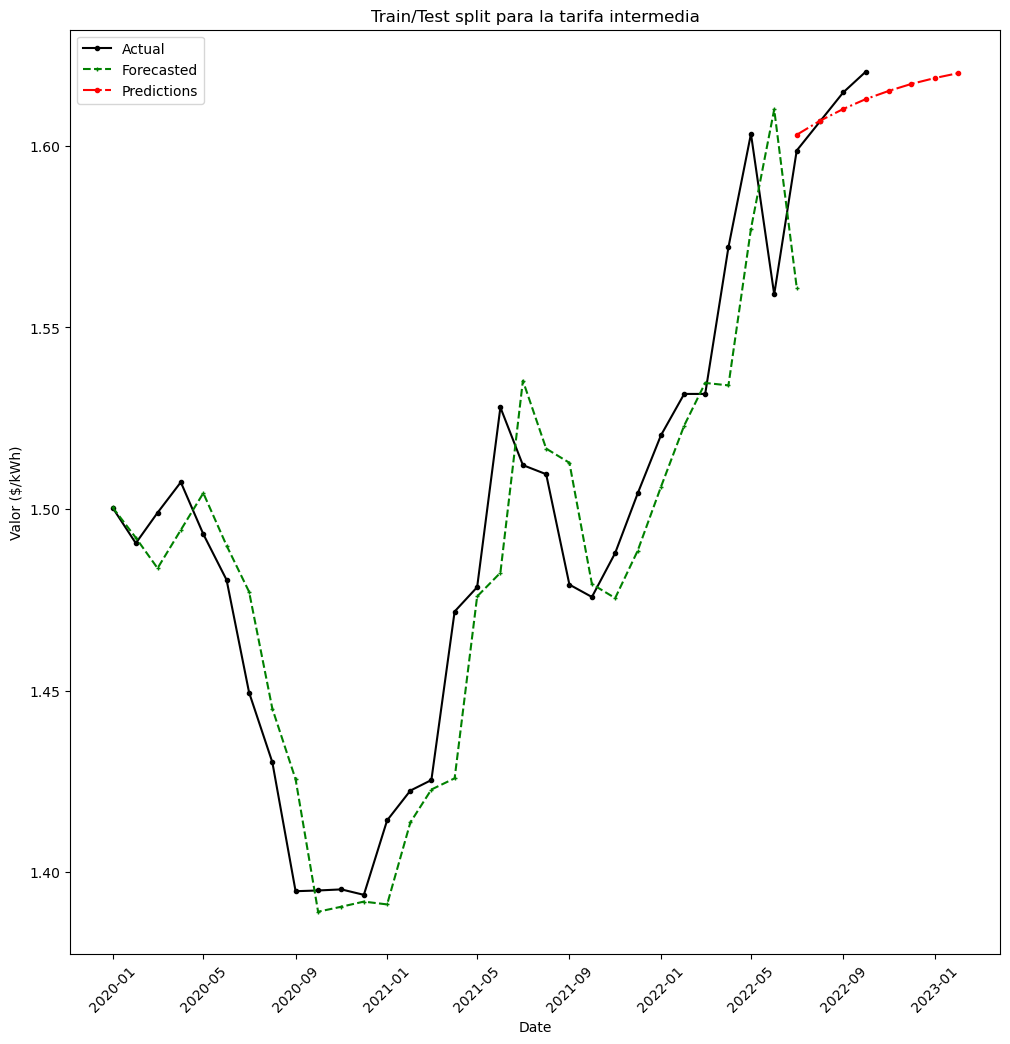

In [27]:
#plot the results and save the plot
forecast_time = pd.Series(pd.date_range(start='2022-07-01', end='2023-02-01', freq=pd.offsets.MonthBegin()))
plt.rcParams['figure.figsize'] = [12, 12]
plt.plot(croped_data['date'], croped_data['Valor'], color = "black", marker = "o", label = "Actual", markersize=3)
plt.plot(croped_data['date'][:31], fit2.fittedvalues, color = "green",linestyle='dashed', marker = "+", label = "Forecasted", markersize=3)
plt.plot(forecast_time, fit2.forecast(7), color = "red",linestyle='dashdot', marker = "o", label = "Predictions", markersize=3)
plt.ylabel('Valor ($/kWh)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.title("Train/Test split para la tarifa intermedia")
plt.savefig("./assets/images/png/forecast.png")
plt.show()

In [28]:
#calculate the error of the model
print('El valor de RMSE es {}'.format(np.sqrt(((test.Valor.values - pred2)**2).mean())))

El valor de RMSE es 0.00491305034066036
